# Cargar librerias

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import geopandas as gpd
from folium.plugins import HeatMap

## Cargar datos

In [86]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Procesados/data_limpia.csv')
df.head(2)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Agrupar datos de localización por frecuencia

In [87]:
# Agrupar los datos por la columna 'localizacion' y contar las ocurrencias
conteo_localizacion = df['localizacion'].value_counts()

# Mostrar el resultado
print(conteo_localizacion)

localizacion
Manga                       96
Pie de Popa                 48
El Recreo                   37
El Bosque                   28
Crespo                      28
                            ..
Pie Del Cerro                1
Los Almendros                1
Jose Obrero                  1
Urbanización La Espanola     1
11 de Noviembre              1
Name: count, Length: 122, dtype: int64


# Grafica de localización

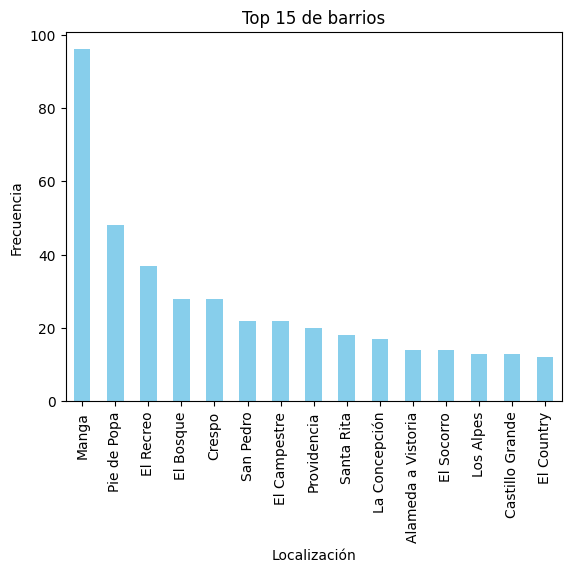

In [88]:
# Creando un gráfico de barras
conteo_localizacion.head(15).plot(kind='bar', color='skyblue')
# Añadir etiquetas y título
plt.title('Top 15 de barrios')
plt.xlabel('Localización')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

  CODIGO                NOMBRE  UCG LOC  AREA_HA  PE  POB_BARRIO  TOTAL_HOMB  \
0   0150       DANIEL LEMAITRE 3.00  LH    59.67  P3    17346.00     8506.00   
1   0200           SANTA MARIA 3.00  LH     8.75  P2     5396.00     2634.00   
2   0250              CANAPOTE 3.00  LH    23.60  P2     7750.00     3750.00   
3   0300  SAN PEDRO Y LIBERTAD 2.00  LH    17.19  P2     4440.00     2195.00   
4   0350       SIETE DE AGOSTO 3.00  LH    12.82  P2     6751.00     3295.00   

   TOTAL_MUJE  NO_LEE_ESC                                           geometry  
0     8840.00     1436.00  POLYGON ((842131.215 1645842.043, 842048.374 1...  
1     2762.00      451.00  POLYGON ((842462.954 1646801.211, 842457.697 1...  
2     4000.00      679.00  POLYGON ((841472.83 1646291.422, 841471.824 16...  
3     2245.00      370.00  POLYGON ((841414.301 1646838.488, 841411.788 1...  
4     3456.00      638.00  POLYGON ((842701.018 1646249.319, 842692.207 1...  


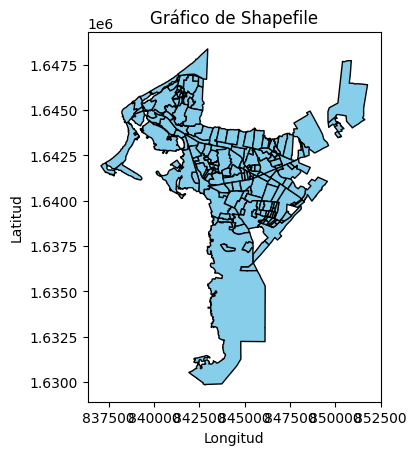

In [89]:
# Lee el archivo .shp
gdf = gpd.read_file('../Data/shapefiles/Barrios/Barrios.shp')
gdf=gdf.iloc[:185]
# Muestra las primeras filas del GeoDataFrame
print(gdf.head())

# Grafica el contenido geoespacial del archivo .shp
gdf.plot(color='skyblue', edgecolor='black')

# Añadir título y etiquetas si es necesario
plt.title('Gráfico de Shapefile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Muestra el gráfico
plt.show()

In [90]:
# Convierte los nombres de localización y NOMBRE a minúsculas
conteo_localizacion.index = conteo_localizacion.index.str.lower()
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()


In [91]:
# Convierte la Serie en un DataFrame y renómbrala a 'conteo' o el nombre que prefieras
conteo_localizacion = conteo_localizacion.to_frame('localizacion')

# Verifica el contenido del DataFrame
print(conteo_localizacion.head())


              localizacion
localizacion              
manga                   96
pie de popa             48
el recreo               37
el bosque               28
crespo                  28


In [92]:
# Realiza el merge entre el conteo de localizaciones y gdf basándote en la columna 'NOMBRE'
gdf_conteo = gdf.merge(conteo_localizacion, left_on='NOMBRE', right_index=True, how='left')

# Verifica el resultado del merge
print(gdf_conteo[['NOMBRE', 'localizacion']].head())


                 NOMBRE  localizacion
0       daniel lemaitre          2.00
1           santa maria          1.00
2              canapote          3.00
3  san pedro y libertad           NaN
4       siete de agosto           NaN


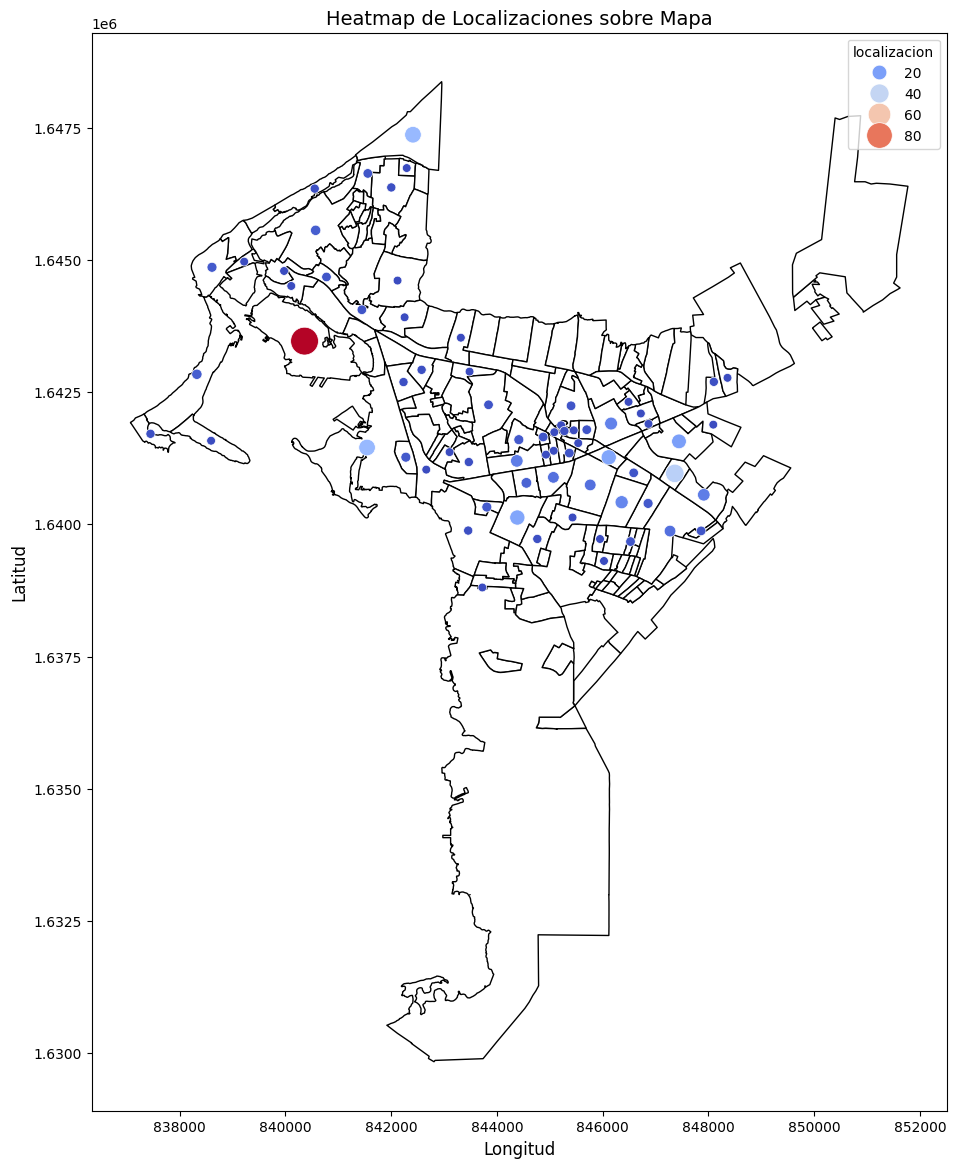

In [93]:
# centroides de geometry
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 14))

# Graficar el shapefile en el fondo (el mapa)
gdf.plot(ax=ax, color='white', edgecolor='black')

# Graficar el heatmap de acuerdo con las ubicaciones (usando las coordenadas del centroide)
sns.scatterplot(x=gdf_conteo['x'], 
                y=gdf_conteo['y'], 
                hue=gdf_conteo['localizacion'], 
                palette='coolwarm',  # Paleta de colores
                size=gdf_conteo['localizacion'],  # Tamaño de los puntos según el conteo
                sizes=(40, 400),  # Rango de tamaños de los puntos
                legend=True,  # Desactiva la leyenda si no la necesitas
                ax=ax)  # Usa el mismo eje para superponer el gráfico

# Añadir título y etiquetas
plt.title('Heatmap de Localizaciones sobre Mapa', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)

# Mostrar el gráfico
plt.show()

In [94]:
print(gdf_conteo[['x', 'y']].head())  # Verifica las primeras coordenadas

          x          y
0 842003.92 1646369.16
1 842295.57 1646735.87
2 841559.65 1646634.11
3 841086.67 1646365.61
4 842578.75 1646533.84


In [84]:
print(gdf_conteo['localizacion'])

0      2.00
1      1.00
2      3.00
5      5.00
21     1.00
       ... 
170    1.00
171    1.00
171    1.00
172   28.00
183    1.00
Name: localizacion, Length: 70, dtype: float64


In [97]:

# Centroides segun la geometria del mapa
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Reproyectar las coordenadas de UTM a latitud/longitud (EPSG:4326)
gdf_conteo = gdf_conteo.to_crs(epsg=4326)

# Coordenadas para centrar el mapa en Cartagena
map_center = [10.3910, -75.4792]  # Latitud y Longitud de Cartagena
m = folium.Map(location=map_center, zoom_start=12)

# Añadir el shapefile del fondo (si es necesario)
folium.GeoJson(gdf).add_to(m)
gdf_conteo = gdf_conteo.dropna(subset=['localizacion']) 
# Agregar puntos sobre el mapa (usando los centroides)
for idx, row in gdf_conteo.iterrows():
    folium.CircleMarker(
        location=[row['y'], row['x']],  # Coordenadas del centroide
        radius=row['localizacion'] / 10,  # Tamaño del círculo (ajustar según sea necesario)
        color='blue',  # Color del borde
        fill=True,  # Relleno
        fill_color='coolwarm',  # Color de relleno
        fill_opacity=0.6,  # Transparencia del relleno
    ).add_to(m)

# Añadir HeatMap (opcional, si deseas un mapa de calor)
heat_data = [[row['y'], row['x']] for idx, row in gdf_conteo.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('../Resultados/pdf/mapa.html')

# Mostrar el mapa
m


/tmp/ipykernel_1254795/3679214362.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
